# Tugas Computer Vision - Arithmetic Operations

## Pertama-tama, ganti NIM di nama file ini. Klik <font color="red">File -> Save as... </font>

Lalu isi yang di bawah ini. Untuk mengedit cell ini, double-click di sini.
### NAMA:Vivin Qotimah
### NIM: A710190099

Video kuliah terkait topik ini: https://www.youtube.com/watch?v=W5FyJ-cavAU

Push Tugas 4 ke GitHub: https://www.youtube.com/watch?v=whhZDlVTsGo

#### Lengkapi kode di bawah dan jalankan


In [2]:
from time import ctime
from os import getcwd
import sys
nama = "Vivin Qotimah"     ## Ganti dengan namamu
NIM = "A710190099"     ## Ganti dengan NIM-mu
kota = "Sragen"     ## Ganti dengan kotamu
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

NAMA: Vivin Qotimah
NIM : A710190099
Kota: Sragen
Thu Jul 14 16:30:53 2022

C:\Users\wahyu Dwi Romiatun\Downloads
C:\Users\wahyu Dwi Romiatun\AppData\Local\Programs\Python\Python310\python.exe
3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]


##  Import the libraries

In [2]:
## Silakan import semua library yang diperlukan di cell ini
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image, Markdown

## Buatlah blending tiga gambar yang disediakan.

- Gambar pertama adalah gedung edutorium ums. Ini adalah gambar utama.
- Gambar kedua adalah tulisan "pti-ums-2022"
- Gambar ketiga adalah logo PTI UMS

Campur (*blend*) ketiga gambar di atas dengan ketentuan:
- Gambar pertama bobot 1
- Gambar kedua bobot 0.3, tulisan kuning akan terlihat samar. 
  - Ketentuan letak: pojok tulisan kiri atas bergabung di pixel (50, 50) gambar utama - seperti di video kuliah, dan berakhir 50 pixel dari kanan. Tulisan akan tampak simetris di tengah-atas. Jadi kamu harus menyesuaikan ukurannya. Saat penyesuaian ukuran, aspect ratio tidak boleh berubah.
- Gambar ketiga bobot 0.5, logo PTI akan terlihat samar tapi lebih jelas
  - Perhatikan bahwa gambar logonya latar belakang aslinya adalah putih (255 atau kurang sedikit). Sebelum blending, kamu perlu merubah latar belakangnya menjadi hitam (bernilai 0). **Lakukan ini dengan cv2**
  - Ketentuan letak: pojok kiri bawah logo berimpitan dengan pixel 20 dari bawah dan 20 dari kiri gambar utama. Tinggi logo tidak boleh melebihi garis separuh gambar utama. Kamu harus menyesuaikan ukurannya. Saat penyesuaian ukuran, aspect ratio tidak boleh berubah.



In [4]:
from IPython.display import Markdown
Markdown('<br><font size="7">{}...{}</font>'.format(chr(128552), chr(128557) ) )

<br><font size="7">😨...😭</font>

In [5]:
Markdown('<br><font size="7">{}</font>'.format(chr(128512)))

<br><font size="7">😀</font>

(421, 670, 3)


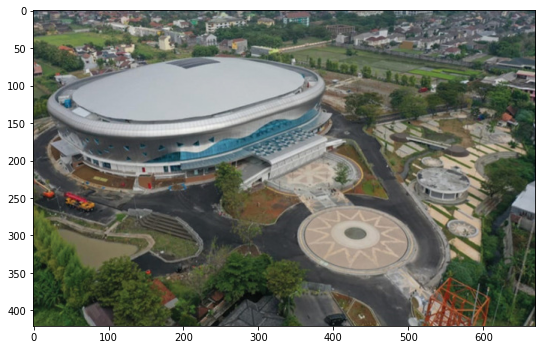

In [98]:
## Taruh kodemu di bawah ini. Beri komentar selengkap lengkapnya
gedung_edu = cv2.imread("gedung_edu.jpg", cv2.IMREAD_COLOR)
plt.imshow(gedung_edu[:,:,::-1])
print(gedung_edu.shape)

(133, 1348, 3)


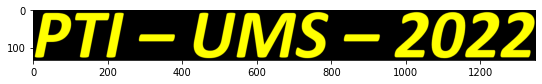

In [99]:
tulisan = cv2.imread("pti_yellow.png", cv2.IMREAD_COLOR)
plt.imshow(tulisan[:,:,::-1])
print(tulisan.shape)

In [100]:
# resize
tulis_rez= cv2.resize(tulisan,None,fx=0.4, fy=0.4)

In [101]:
tulis_rez.shape

(53, 539, 3)

In [102]:
gedung_edu.shape


(421, 670, 3)

In [103]:
#buat layer
layer_edu = np.zeros(gedung_edu.shape, dtype=np.uint8)

In [104]:
top_left_tulisan = np.array([50,50], dtype=np.uint8)
print(top_left_tulisan[0])
print(tulis_rez.shape[0])
print(top_left_tulisan[1])
print(tulis_rez.shape[1])

50
53
50
539


In [105]:
layer_edu[top_left_tulisan[0]:top_left_tulisan[0]+tulis_rez.shape[0], top_left_tulisan[1]:top_left_tulisan[1]+tulis_rez.shape[1]  ] = tulis_rez


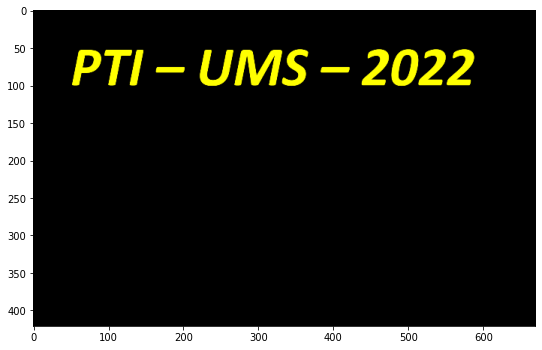

In [106]:
plt.imshow(layer_edu[:,:,::-1])

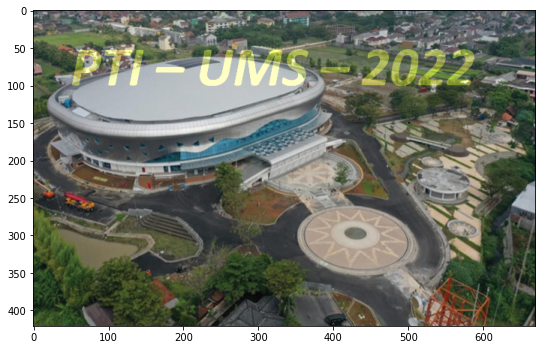

In [107]:
g = cv2.addWeighted(gedung_edu,1, layer_edu, 0.3, 0)

plt.imshow(g[:,:,::-1])

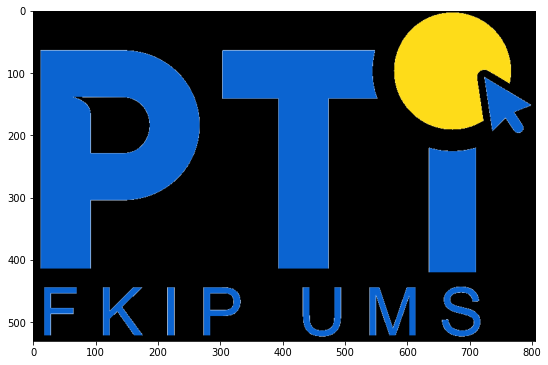

In [108]:
#ubah backfround
img = cv2.imread("pti.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

img[thresh == 255] = 0

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
erosion = cv2.erode(img, kernel, iterations = 1)

plt.imshow(img[:,:,::-1])

(106, 161, 3)


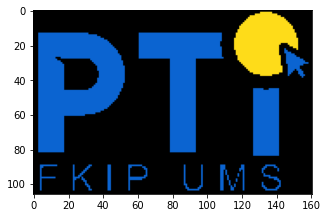

In [109]:
tulisan_pti = cv2.resize(erosion,None,fx=0.2, fy=0.2) 
plt.figure(figsize=[5,5])
plt.imshow(tulisan_pti[:,:,::-1])
print(tulisan_pti.shape)

In [110]:
#buat layer baru untuk logo pti
layer_edu2 = np.zeros(gedung_edu.shape, dtype=np.uint8)

In [111]:
down_right_tulisan = np.array([255,20], dtype=np.uint8)
print(down_right_tulisan[0])
print(tulisan_pti.shape[0])
print(down_right_tulisan[1])
print(tulisan_pti.shape[1])

255
106
20
161


In [112]:
layer_edu2[down_right_tulisan[0]:down_right_tulisan[0]+tulisan_pti.shape[0], down_right_tulisan[1]:down_right_tulisan[1]+tulisan_pti.shape[1]  ] = tulisan_pti

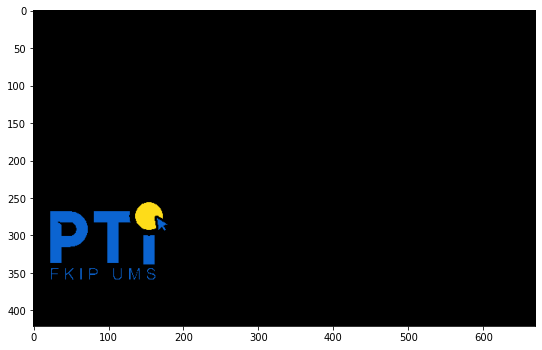

In [113]:
plt.imshow(layer_edu2[:,:,::-1])

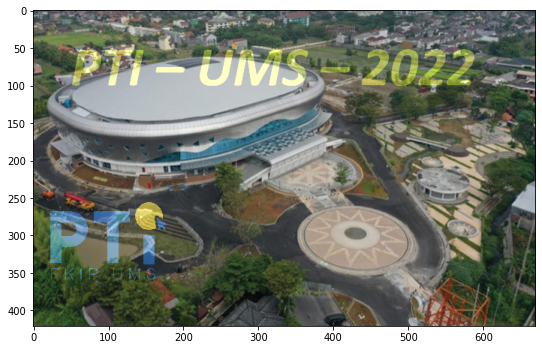

In [114]:
finis = cv2.addWeighted(g,1, layer_edu2, 0.5, 0)

plt.imshow(finis[:,:,::-1])

**Pertanyaan:** untuk logo PTI, mengapa kita perlu merubah latar belakangnya menjadi hitam? Apa akibatnya kalau langkah ini tidak dilakukan? (Kamu bisa bereksperimen)

**Jawaban:** karena kalau tidak dirubah jadi hitam nanti tidak bisa di masking seperti di layer_edu yang pertama

In [115]:
Markdown('<br><font size="7">{}</font>'.format(chr(129300)))

<br><font size="7">🤔</font>

### Save, add, commit. Then push to github

In [116]:
Markdown('<br><font size="7">{}</font>'.format(chr(128515)))

<br><font size="7">😃</font>